# Exercício


Neste exercício, tentaremos identificar diferentes `perfis de clientes` de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket`.

O dataset está disponível em [formato .csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) ou em [formato .xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Days_Registered`: Quantidade de Dias desde o cadastro

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário



**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


Obs: este dataset foi `adaptado` a partir do original encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [ ]:
# Importando as dependências externas
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [ ]:
# Importando dados
dados = pd.read_csv('dados.csv')
dados.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,5,0,0,0,0,0,0,3,11,0


### Atividade 2: Faça o tratamento dos Dados.
Dica: verifique `dados ausentes` e `outliers` e, se necessário, remova as linhas.

In [ ]:
# Verificando se existem dados ausentes
print(dados.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Days_Registered         0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
# Eliminando as linhas com dados ausentes na coluna 'Income'
dados_limpos = dados.dropna(subset=['Income'])
print(dados_limpos['Income'].isna().sum())

0


In [ ]:
# Criando a coluna 'Age' a partir da coluna 'Year_Birth'
dados_limpos['Age'] = 2023 - dados_limpos['Year_Birth']
print(dados_limpos['Age'])

0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: Age, Length: 2216, dtype: int64


<ipython-input-30-5c0da301aec0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos['Age'] = 2023 - dados_limpos['Year_Birth']


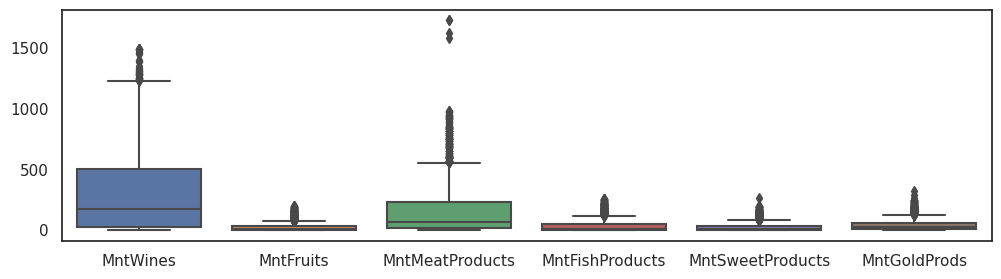

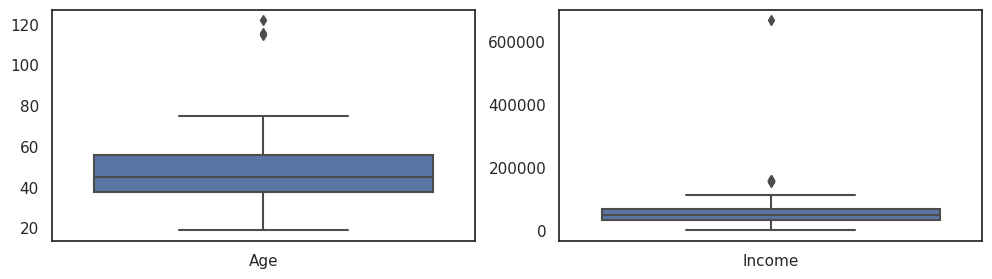

In [ ]:
# Gerando boxplots para identificação de outliers
sns.set(style='white', rc={'figure.figsize':(12,3)})
sns.boxplot(dados_limpos[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]);

sns.set(style='white', rc={'figure.figsize':(12,3)})
fig, axs = plt.subplots(ncols=2, nrows=1)
sns.boxplot(dados_limpos[['Age']], ax=axs[0]);
sns.boxplot(dados_limpos[['Income']], ax=axs[1]);

In [ ]:
# Visualizando os valores suspeitos
print('Income: \n', dados_limpos['Income'].nlargest(10))
print('\n --------------------- \n')
print('Age: \n', dados_limpos['Age'].nlargest(10))

Income: 
 2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
Name: Income, dtype: float64

 --------------------- 

Age: 
 239     122
339     116
192     115
1950     75
424      74
39       72
358      72
415      72
894      72
1150     72
Name: Age, dtype: int64


In [ ]:
# Garbage data:
# Na coluna Income, a linha 2233, de valor $ 666666.0
# Na coluna Age, as linhas 239, 339 e 192, com valores 1901, 1907 e 1908, respectivamente

# Removendo 'garbage data' do dataframe dados_limpos
dados_limpos.drop([2233, 239, 339, 192], axis=0, inplace=True)


# Confirmando se as linhas foram removidas corretamente
print(dados_limpos['Income'].nlargest(3))
print('\n --------------------- \n')
print(dados_limpos['Age'].nlargest(3))

617     162397.0
687     160803.0
1300    157733.0
Name: Income, dtype: float64

 --------------------- 

1950    75
424     74
39      72
Name: Age, dtype: int64


<ipython-input-33-d5238f764e75>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos.drop([2233, 239, 339, 192], axis=0, inplace=True)


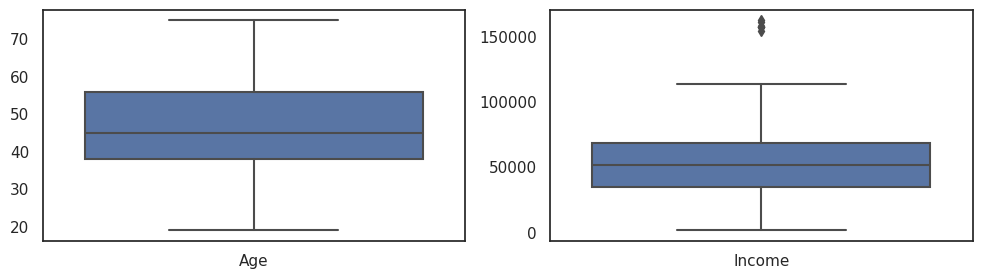

In [ ]:
# # Gerando novamente os boxplots
sns.set(style='white', rc={'figure.figsize':(12,3)})
fig, axs = plt.subplots(ncols=2, nrows=1)
sns.boxplot(dados_limpos[['Age']], ax=axs[0]);
sns.boxplot(dados_limpos[['Income']], ax=axs[1]);

### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [ ]:
# Criando a coluna "MntTotal"
dados_limpos['MntTotal'] = dados_limpos[['MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].sum(axis=1)
print(dados_limpos['MntTotal'])

0       1445
1         25
2        665
3         43
4        376
        ... 
2235    1299
2236     444
2237    1209
2238     763
2239     170
Name: MntTotal, Length: 2212, dtype: int64


<ipython-input-35-f46513d6d506>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos['MntTotal'] = dados_limpos[['MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].sum(axis=1)


### Atividade 4: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [ ]:
# Selecionando as colunas de interesse
dados_selec = dados_limpos[['Recency', 'Days_Registered', 'MntTotal', 'Income']]
dados_selec.head(2)

,Recency,Days_Registered,MntTotal,Income
0,58,849,1445,58138.0
1,38,299,25,46344.0


In [ ]:
# Gerando matriz de correlações
dados_selec.corr()

,Recency,Days_Registered,MntTotal,Income
Recency,1.000000,0.025681,0.021613,0.007965
Days_Registered,0.025681,1.000000,0.160023,-0.023760
MntTotal,0.021613,0.160023,1.000000,0.789499
Income,0.007965,-0.023760,0.789499,1.000000


### Atividade 5: Padronize os dados.

In [ ]:
# Instanciando a função StandardScaler
scaler = StandardScaler()

# Padronizando os dados
dados_selec.loc[:, dados_selec.columns] = scaler.fit_transform(dados_selec)
dados_selec.head(2)

<ipython-input-38-a1c8a75b3706>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_selec.loc[:, dados_selec.columns] = scaler.fit_transform(dados_selec)


,Recency,Days_Registered,MntTotal,Income
0,0.310353,1.527721,1.539050,0.287105
1,-0.380813,-1.189011,-0.957522,-0.260882


### Atividade 6: Faça um agrupamento hierárquico e plote o dendograma.

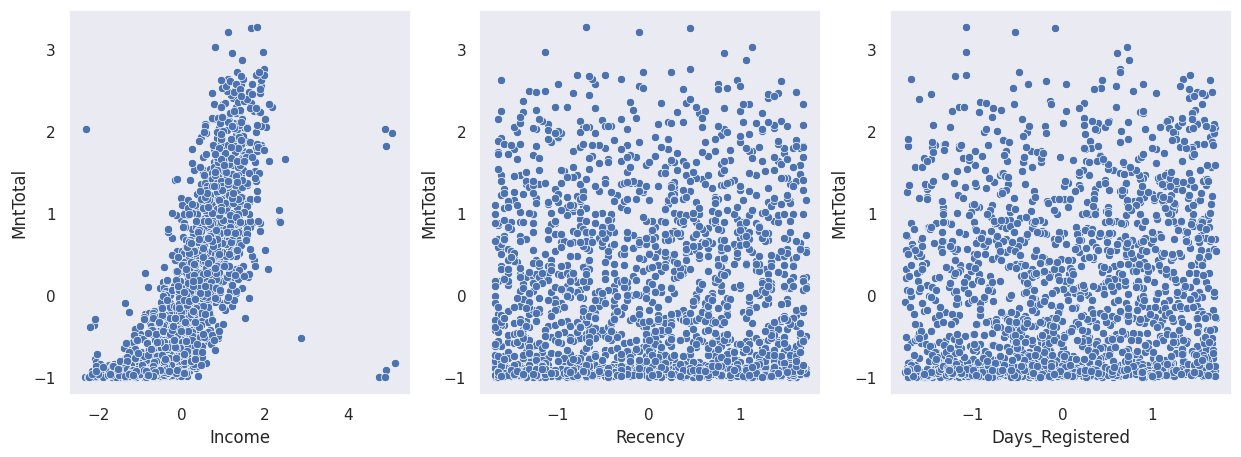

In [ ]:
sns.set(style='dark', rc={'figure.figsize':(15,5)})
fig, axs = plt.subplots(ncols=3, nrows=1)

#Visualizando dados no gráfico de dispersão Income vs MntTotal
sns.scatterplot(data=dados_selec, x='Income', y='MntTotal', ax=axs[0]);

#Visualizando dados no gráfico de dispersão Recency vs MntTotal
sns.scatterplot(data=dados_selec, x='Recency', y='MntTotal', ax=axs[1]);

#Visualizando dados no gráfico de dispersão Recency vs MntTotal
sns.scatterplot(data=dados_selec, x='Days_Registered', y='MntTotal', ax=axs[2]);

In [ ]:
# Criando a matriz de distâncias para geração do dendrograma
distancias = linkage(dados_selec[['MntTotal', 'Income', 'Days_Registered', 'Recency']], method='ward', metric='euclidean')
distancias

array([[5.02000000e+02, 1.07600000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.83000000e+02, 1.59400000e+03, 0.00000000e+00, 2.00000000e+00],
       [8.61000000e+02, 1.41900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.41700000e+03, 4.41800000e+03, 3.63523646e+01, 9.92000000e+02],
       [4.41600000e+03, 4.41900000e+03, 4.01281707e+01, 1.22000000e+03],
       [4.42000000e+03, 4.42100000e+03, 7.61520657e+01, 2.21200000e+03]])

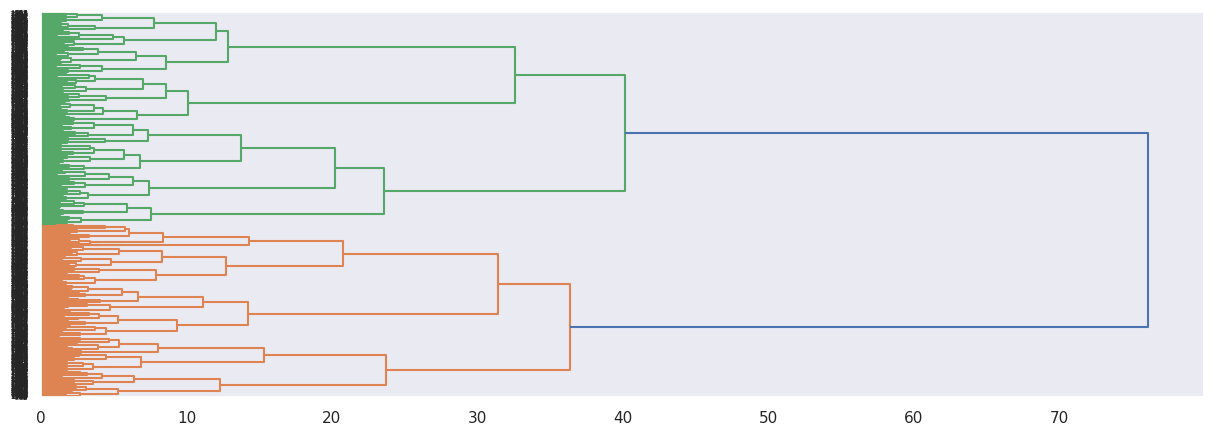

In [ ]:
dendrograma_1 = dendrogram(distancias, orientation='right')

### Atividade 7: Encontre a quantidade que parece adequada para o número de grupos.
Dicas:
* Faça a análise a partir do dendrograma acima, escolha uma quantidade de clusters que parecer adequada e crie uma coluna com o nome `grupos` no dataframe.
* Adicione a coluna `grupos` ao dataframe contendo todas as variáveis (e não somente aquelas utilizadas para os agrupamentos), assim você poderá fazer uma análise mais ampla dos consumidores.
* Para o propósito deste exercício, utilize um `máximo` de 4 grupos para permitir uma boa visualização nas etapas a seguir.

In [ ]:
# Existem dois grandes grupos de clientes. De acordo com o dendograma, essa é a divisão mais relevante do dataset

# Gerando o agrupamento hierárquico
agrupamento = fcluster(distancias, t=2, criterion='maxclust')
agrupamento

array([1, 2, 1, ..., 1, 1, 2], dtype=int32)

In [ ]:
# Criando a coluna "Grupos"
dados_selec.loc[:,'Grupos'] = agrupamento
dados_selec.head(2)

<ipython-input-43-bc8cd077e28f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_selec.loc[:,'Grupos'] = agrupamento


,Recency,Days_Registered,MntTotal,Income,Grupos
0,0.310353,1.527721,1.539050,0.287105,1
1,-0.380813,-1.189011,-0.957522,-0.260882,2


### Atividade 8: Crie Gráficos para visualizar os Grupos.

In [ ]:
# Inserindo a coluna "Grupos" no dataframe "dados_limpos"
dados_limpos['Grupos'] = dados_selec['Grupos']
print(dados_limpos['Grupos'])

0       1
1       2
2       1
3       2
4       1
       ..
2235    1
2236    1
2237    1
2238    1
2239    2
Name: Grupos, Length: 2212, dtype: int32


<ipython-input-44-40fd8c779d2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos['Grupos'] = dados_selec['Grupos']


#### Atividade 8.1: Crie Visualizações em Boxplot
Dica: utilize o Seaborn para criar boxplots com os clusters selecionados.

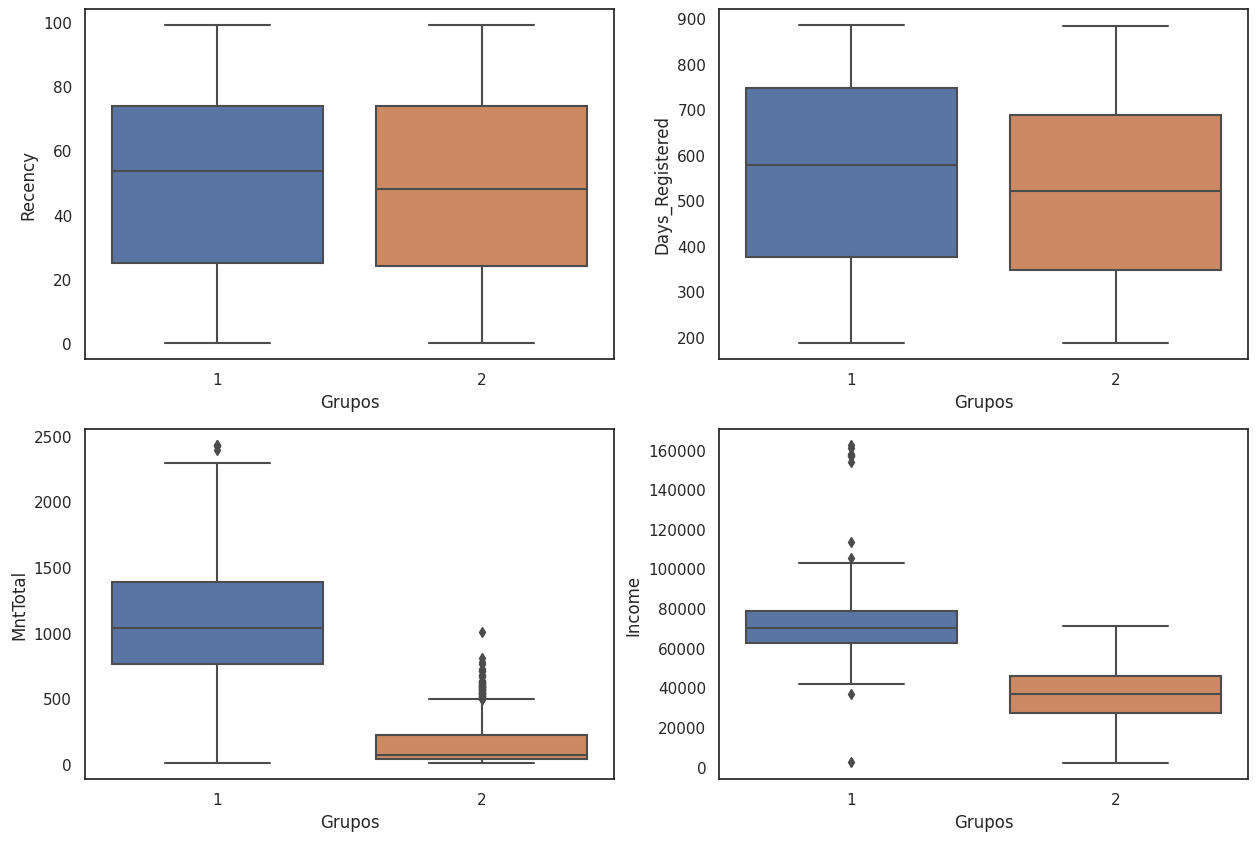

In [ ]:
sns.set(style='white', rc={'figure.figsize':(15,10)})
fig, axs = plt.subplots(ncols=2, nrows=2)

#Gerando boxplot da coluna 'Recency'
sns.boxplot(x='Grupos', y='Recency', data=dados_limpos, ax=axs[0,0]);

# #Gerando boxplot da coluna 'Days_Registered'
sns.boxplot(x='Grupos', y='Days_Registered', data=dados_limpos, ax=axs[0,1]);

# #Gerando boxplot da coluna 'MntTotal'
sns.boxplot(x='Grupos', y='MntTotal', data=dados_limpos, ax=axs[1,0]);

# #Gerando boxplot da coluna 'Income'
sns.boxplot(x='Grupos', y='Income', data=dados_limpos, ax=axs[1,1]);

#### Atividade 8.2: Crie Histogramas para visualizar os Grupos
Dica: utilize o Seaborn para plotar histogramas dos clusters selecionados.

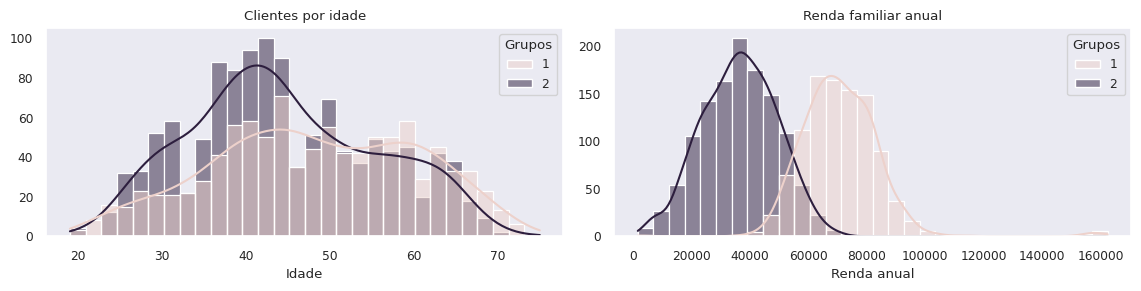

In [ ]:
# Configurando a apresentação do gráfico
sns.set(style='dark', font_scale=0.8)

# Gerando histogramas
colunas = ['Age', 'Income']
titulos = ['Clientes por idade', 'Renda familiar anual']
eixo_x = ['Idade', 'Renda anual']

fig, axs = plt.subplots(1, 2, figsize=(11.5,3))

for i, (colunas, titulos, eixo_x) in enumerate(zip(colunas, titulos, eixo_x)):
    sns.histplot(data=dados_limpos, x=colunas, bins=30, kde=True, hue='Grupos', ax=axs[i])
    axs[i].set_title(titulos)
    axs[i].set_xlabel(eixo_x)
    axs[i].set_ylabel('')

plt.tight_layout()
plt.show()

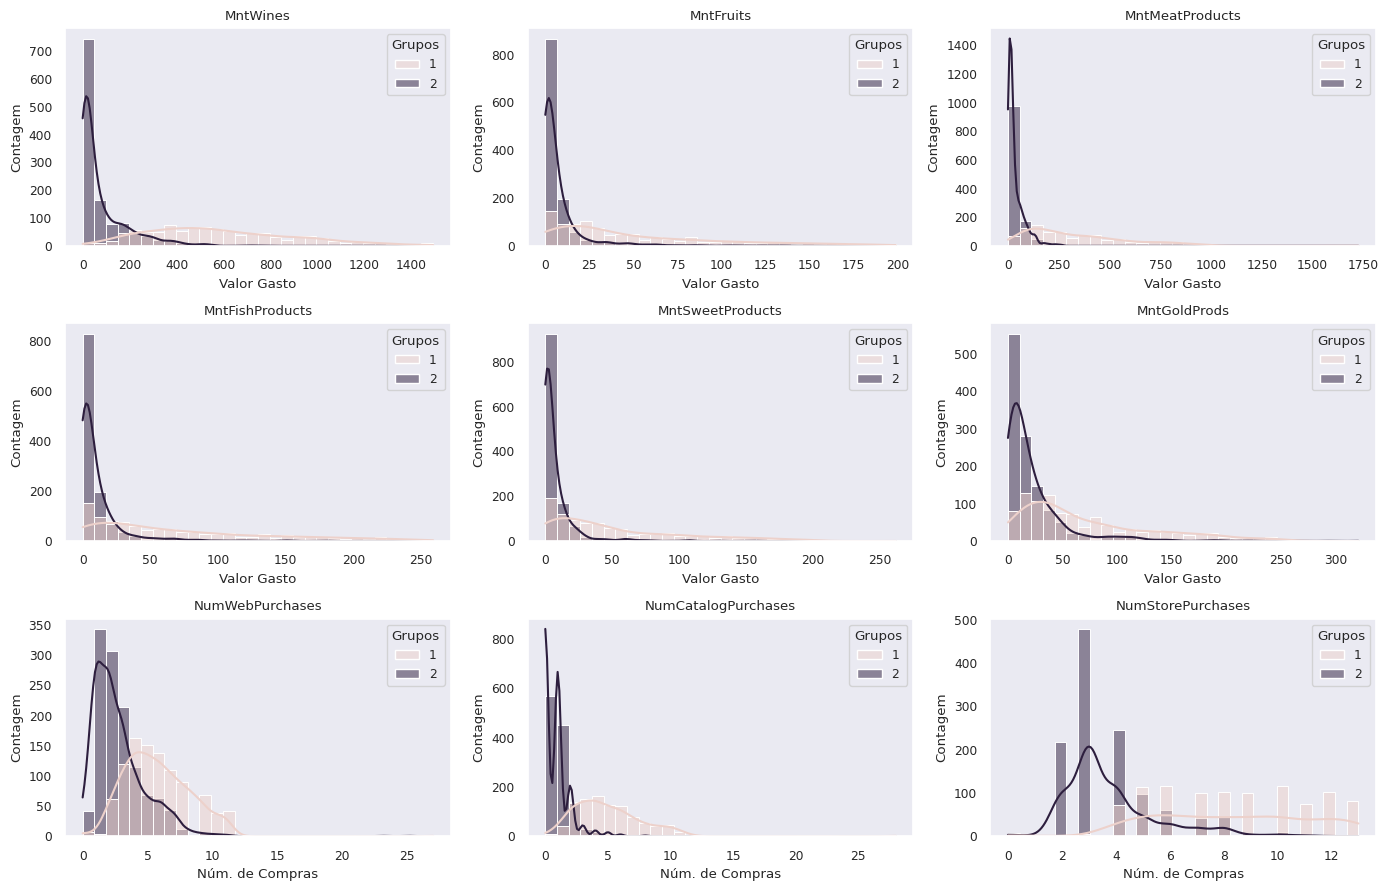

In [ ]:
# Distribuição de gastos por tipo de produto nos últimos 2 anos
produtos = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Distribuição do número de compras por meio/local de compra
meios = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Combina as listas produtos e meios
combinado = produtos + meios

# Calculando o número total de gráficos e o número de linhas para o grid
total_graficos = len(combinado)
n_linhas = total_graficos // 3 + total_graficos % 3

# Criando os subgráficos
fig, axs = plt.subplots(n_linhas, 3, figsize=(14, 3*n_linhas))

# Plotando os histogramas
for i, item in enumerate(combinado):
    sns.histplot(data=dados_limpos, x=item, bins=30, kde=True, hue='Grupos', ax=axs[i//3, i%3])
    if item in produtos:
        axs[i//3, i%3].set_title(f'{item}')
        axs[i//3, i%3].set_xlabel('Valor Gasto')
    else:
        axs[i//3, i%3].set_title(f'{item}')
        axs[i//3, i%3].set_xlabel('Núm. de Compras')
    axs[i//3, i%3].set_ylabel('Contagem')

# Se o total de gráficos não for um múltiplo de 3, remove os últimos subgráficos (vazios)
# if total_graficos % 3 != 0:
#     for i in range(total_graficos, n_linhas*3):
#         fig.delaxes(axs[i//3, i%3])

plt.tight_layout()
plt.show()

In [ ]:
#Verificando a qtd de clientes em cada cluster
qtd_total = len(dados_limpos)
qtd_grupo1 = (dados_limpos['Grupos'] == 1).sum()
qtd_grupo2 = (dados_limpos['Grupos'] == 2).sum()

print('Grupo 1: ', qtd_grupo1, 'clientes' ,'(', "{:.2%}".format(qtd_grupo1/qtd_total), ')', ' | ', 'Grupo 2: ', qtd_grupo2, 'clientes', '(', "{:.2%}".format(qtd_grupo2/qtd_total), ')',' | Total: ', qtd_total, 'clientes')


Grupo 1:  992 clientes ( 44.85% )  |  Grupo 2:  1220 clientes ( 55.15% )  | Total:  2212 clientes


In [ ]:
# Comparando gastos totais entre os grupos
gasto_total = dados_limpos['MntTotal'].sum()
gasto_total_grupo1 = dados_limpos[dados_limpos['Grupos'] == 1]['MntTotal'].sum()
gasto_total_grupo2 = dados_limpos[dados_limpos['Grupos'] == 2]['MntTotal'].sum()

print(
      'Gasto total Grupo 1: ', "${:,.2f}".format(gasto_total_grupo1), ' (', "{:.2%}".format(gasto_total_grupo1/gasto_total),') | '
      'Gasto total Grupo 2: ', "${:,.2f}".format(gasto_total_grupo2), ' (', "{:.2%}".format(gasto_total_grupo2/gasto_total),')'
      )

Gasto total Grupo 1:  $1,078,426.00  ( 85.59% ) | Gasto total Grupo 2:  $181,572.00  ( 14.41% )


In [ ]:
# Calculando o gasto médio por cliente de cada grupo
gasto_medio_grupo1 = "${:,.2f}".format(dados_limpos[dados_limpos['Grupos'] == 1]['MntTotal'].mean())
gasto_medio_grupo2 = "${:,.2f}".format(dados_limpos[dados_limpos['Grupos'] == 2]['MntTotal'].mean())
print('Gasto médio Grupo 1: ', gasto_medio_grupo1, ' | ', 'Gasto médio Grupo 2: ', gasto_medio_grupo2)

Gasto médio Grupo 1:  $1,087.12  |  Gasto médio Grupo 2:  $148.83


In [ ]:
# Calculando a quantidade de filhos por grupo
kids_grupo1 = dados_limpos[dados_limpos['Grupos'] == 1]['Kidhome'].sum()
teens_grupo1 = dados_limpos[dados_limpos['Grupos'] == 1]['Teenhome'].sum()
print('Grupo 1: ', "{:,.2f}".format(kids_grupo1/qtd_grupo1),' crianças por família e ',  "{:,.2f}".format(teens_grupo1/qtd_grupo1), 'adolescentes por família')

kids_grupo2 = dados_limpos[dados_limpos['Grupos'] == 2]['Kidhome'].sum()
teens_grupo2 = dados_limpos[dados_limpos['Grupos'] == 2]['Teenhome'].sum()
print('Grupo 2: ', "{:,.2f}".format(kids_grupo2/qtd_grupo2),' crianças por família e ',  "{:,.2f}".format(teens_grupo2/qtd_grupo2), 'adolescentes por família')

Grupo 1:  0.12  crianças por família e  0.49 adolescentes por família
Grupo 2:  0.70  crianças por família e  0.52 adolescentes por família


In [ ]:
# Calcunado a renda familias média
renda_media_grupo1 = dados_limpos[dados_limpos['Grupos'] == 1]['Income'].mean()
renda_media_grupo2 = dados_limpos[dados_limpos['Grupos'] == 2]['Income'].mean()
print('Rendas médias:')
print('Grupo 1 = ', "${:,.2f}".format(renda_media_grupo1), ' | ', 'Grupo 2 = ', "${:,.2f}".format(renda_media_grupo2))

Rendas médias:
Grupo 1 =  $70,892.55  |  Grupo 2 =  $36,563.50


### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

Descrição dos Grupos:

#### Grupo 1: Clientes VIP

*   45% dos clientes, responsáveis por 85% da receita
*   Gasto médio em 2 anos: 1,087.12 
*   Poder aquisitivo mais alto
*   Renda familiar média de $70k/ano
*   Compras mais frequentes por todos os meios
*   Maior valor gasto em todas as categorias
*   Preferência por compras na loja física
*   Idade média mais alta


#### Grupo 2: Clientes esporádicos

*   55% dos clientes, responsáveis por 15% da receita
*   Gasto médio em 2 anos: 148.83 
*   Renda familiar média de $36k/ano
*   Grupo mais numeroso
*   Maior parte entre 35 e 45 anos
*   Compras menos frequentes e menor valor gasto
*   Famílias com mais crianças

### Para refletir: 


####Quais outras variáveis poderíamos combinar ou processar para obter análises mais precisas?

Exemplo: e se comparássemos o valor gasto com a faixa de salário para entender esses valores percentualmente?

####Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot Encoding